In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# For preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

TIME_STEP = 60

RESOURCES_PATH = "{}/resources".format(os.getcwd())
df_ge = pd.read_csv(os.path.join(RESOURCES_PATH, "ge_us.txt"), engine='python')
df_ge.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
14053,2017-11-06,20.52,20.530,20.08,20.13,60641787,0
14054,2017-11-07,20.17,20.250,20.12,20.21,41622851,0
14055,2017-11-08,20.21,20.320,20.07,20.12,39672190,0
14056,2017-11-09,20.04,20.071,19.85,19.99,50831779,0
14057,2017-11-10,19.98,20.680,19.90,20.49,100698474,0


In [4]:
print(df_ge.shape)
print(df_ge.columns)
print(df_ge.dtypes)

(14058, 7)
Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'OpenInt'], dtype='object')
Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object


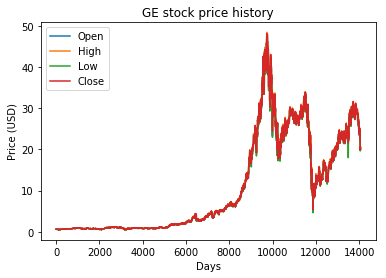

In [5]:
plt.figure()
plt.plot(df_ge["Open"])
plt.plot(df_ge["High"])
plt.plot(df_ge["Low"])
plt.plot(df_ge["Close"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

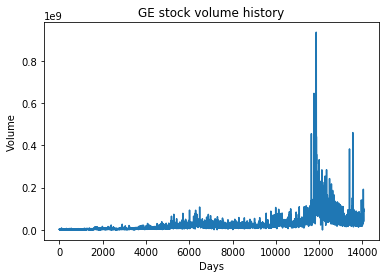

In [6]:
plt.figure()
plt.plot(df_ge["Volume"])
plt.title('GE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [7]:
print("checking if any null values are present\n", df_ge.isna().sum())

('checking if any null values are present\n', Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64)


In [8]:
train_cols = ["Open", "High", "Low", "Close", "Volume"]
df_train, df_test = train_test_split(df_ge, train_size=0.8, test_size=0.2, shuffle=False)
print("Train--Test size", len(df_train), len(df_test))

('Train--Test size', 11246, 2812)


In [9]:
print(df_train.head(5))

         Date    Open    High     Low   Close   Volume  OpenInt
0  1962-01-02  0.6277  0.6362  0.6201  0.6201  2575579        0
1  1962-01-03  0.6201  0.6201  0.6122  0.6201  1764749        0
2  1962-01-04  0.6201  0.6201  0.6037  0.6122  2194010        0
3  1962-01-05  0.6122  0.6122  0.5798  0.5957  3255244        0
4  1962-01-08  0.5957  0.5957  0.5716  0.5957  3696430        0


In [10]:
x = df_train.loc[:, train_cols].values
print(x[:5])

[[6.277000e-01 6.362000e-01 6.201000e-01 6.201000e-01 2.575579e+06]
 [6.201000e-01 6.201000e-01 6.122000e-01 6.201000e-01 1.764749e+06]
 [6.201000e-01 6.201000e-01 6.037000e-01 6.122000e-01 2.194010e+06]
 [6.122000e-01 6.122000e-01 5.798000e-01 5.957000e-01 3.255244e+06]
 [5.957000e-01 5.957000e-01 5.716000e-01 5.957000e-01 3.696430e+06]]


In [11]:
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
print(x_train[:5])

[[0.00356678 0.00352766 0.00358385 0.00338425 0.02108267]
 [0.00340607 0.00319219 0.00341628 0.00338425 0.01365459]
 [0.00340607 0.00319219 0.00323598 0.00321827 0.01758709]
 [0.00323903 0.00302758 0.00272904 0.00287161 0.02730914]
 [0.00289013 0.00268378 0.0025551  0.00287161 0.03135089]]


In [12]:
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])
print(x_test[:5])

[[0.58098604 0.57472167 0.57944514 0.57965821 0.30279224]
 [0.57842746 0.5750759  0.57959362 0.57869176 0.2306256 ]
 [0.58445385 0.57740962 0.583348   0.57984729 0.3773507 ]
 [0.58016137 0.57674284 0.58152384 0.58016244 0.2578744 ]
 [0.58375606 0.5750759  0.58133294 0.57984729 0.20985472]]


[0.57472167 0.5750759  0.57740962 ... 0.41367433 0.40848598 0.42117557]


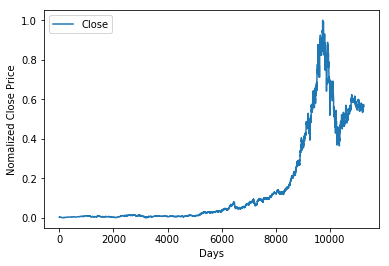

In [15]:
print(x_test[:, 1])
plt.plot(x_train[:, 1])
plt.ylabel('Nomalized Close Price')
plt.xlabel('Days')
plt.legend(['Close'], loc='upper left')
plt.show()